In [41]:
# import libraries
import pandas as pd
import numpy as np
import os
import shutil
import random

import imageio
import matplotlib.pyplot as plt

In [2]:
# read csv 
df = pd.read_csv("full_df.csv")

In [42]:
df

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6387,4686,63,Male,4686_left.jpg,4686_right.jpg,severe nonproliferative retinopathy,proliferative diabetic retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4686_left.jpg
6388,4688,42,Male,4688_left.jpg,4688_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4688_left.jpg
6389,4689,54,Male,4689_left.jpg,4689_right.jpg,mild nonproliferative retinopathy,normal fundus,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4689_left.jpg
6390,4690,57,Male,4690_left.jpg,4690_right.jpg,mild nonproliferative retinopathy,mild nonproliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4690_left.jpg


In [43]:
df[df['Left-Fundus'] == '0_left.jpg']

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
3194,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['C'],"[0, 0, 0, 1, 0, 0, 0, 0]",0_left.jpg


In [68]:
len(df[df['filename'].str.contains('left')])

3198

In [69]:
len(df[df['filename'].str.contains('right')])

3194

In [27]:
## IMAGE TAGGING - ORGANIZING THE IMAGES IN DIRECTORIES BY LABEL

# dataframe with just filenames and labels
df_file_target = df[['filename', 'target']]
# all the images filenames in the dataset
filenames = os.listdir("./preprocessed_images")
ls_df_files = df_file_target['filename'].to_list()
# check if there are images for all the labelled data in the dataframe by checking which rows are not in the image directory
len([ls_df_files[i] for i in ls_df_files if i not in filenames])

0

In [38]:
# dictionary with category names and target vector
categories = {
    "N": "[1, 0, 0, 0, 0, 0, 0, 0]",
    "D": "[0, 1, 0, 0, 0, 0, 0, 0]",
    "G": "[0, 0, 1, 0, 0, 0, 0, 0]",
    "C": "[0, 0, 0, 1, 0, 0, 0, 0]",
    "A": "[0, 0, 0, 0, 1, 0, 0, 0]",
    "H": "[0, 0, 0, 0, 0, 1, 0, 0]",
    "M": "[0, 0, 0, 0, 0, 0, 1, 0]",
    "O": "[0, 0, 0, 0, 0, 0, 0, 1]",
}

# create main directory if not exists
if not os.path.exists('./labeled-images'): os.mkdir('./labeled-images') 

ls_len_df = []
ls_len_directory = []
for c in categories:
    path = './labeled-images/' + c
    if not os.path.exists(path): os.mkdir(path) 
    df_aux = df_file_target[df_file_target['target'] == categories[c]]
    
    path_src = "./preprocessed_images/"
    path_dst = path = './labeled-images/' + c + '/'
    for file in df_aux['filename']:
        shutil.copyfile(path_src + file, path_dst + file)
        
    ls_len_df.append(len(df_aux))
    ls_len_directory.append(len(os.listdir(path)))
    
print("List of dataframe lenghts by category: " + str(ls_len_df))
print("List of directories lenghts by category: " + str(ls_len_df))

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:07<00:00,  1.09it/s]

List of dataframe lenghts by category: [2873, 1608, 284, 293, 266, 128, 232, 708]
List of directories lenghts by category: [2873, 1608, 284, 293, 266, 128, 232, 708]


In [21]:
# Calculating number of images per category
path = './labeled-images/'
categories = os.listdir(path)
print("Categories labels: " + str(categories))

lenghts = [len(os.listdir(path+c)) for c in categories]
print("Categories lenghts: " + str(lenghts))

total_images = np.sum(lenghts)

percentages = list(np.around(np.divide(lenghts, total_images) * 100, 2))
print("Categories percentages: " + str(percentages))

Categories labels: ['A', 'C', 'D', 'G', 'H', 'M', 'N', 'O']
Categories lenghts: [266, 293, 1608, 284, 128, 232, 2873, 708]
Categories percentages: [4.16, 4.58, 25.16, 4.44, 2.0, 3.63, 44.95, 11.08]


In [24]:
print("Total labeled images: " + str(total_images))
print("Total labeled images for Normal (N): " + str(lenghts[6]) + " (" + str(percentages[6]) + "%)")
print("Total labeled images for Diabetes (D): " + str(lenghts[2]) + " (" + str(percentages[2]) + "%)")
print("Total labeled images for Other diseases/abnormalities (O): " + str(lenghts[7]) + " (" + str(percentages[7]) + "%)")
print("Total labeled images for Cataract (C): " + str(lenghts[1]) + " (" + str(percentages[1]) + "%)")
print("Total labeled images for Glaucoma (G): " + str(lenghts[3]) + " (" + str(percentages[3]) + "%)")
print("Total labeled images for Age related Macular Degeneration (A): " + str(lenghts[0]) + " (" + str(percentages[0]) + "%)")
print("Total labeled images for Pathological Myopia (M): " + str(lenghts[5]) + " (" + str(percentages[5]) + "%)")
print("Total labeled images for Hypertension (H): " + str(lenghts[4]) + " (" + str(percentages[4]) + "%)")

Total labeled images: 6392
Total labeled images for Normal (N): 2873 (44.95%)
Total labeled images for Diabetes (D): 1608 (25.16%)
Total labeled images for Other diseases/abnormalities (O): 708 (11.08%)
Total labeled images for Cataract (C): 293 (4.58%)
Total labeled images for Glaucoma (G): 284 (4.44%)
Total labeled images for Age related Macular Degeneration (A): 266 (4.16%)
Total labeled images for Pathological Myopia (M): 232 (3.63%)
Total labeled images for Hypertension (H): 128 (2.0%)


In [47]:
## PLOTTING SAMPLE IMAGES FROM EACH CATEGORY

def sample_plotting(cat_name, cat_label):
    images_filenames = os.listdir(path+cat_label)
    # randomly select a sample of 9 images from the directory
    sample = random.sample(images_filenames, 9)
    cat_path = path + cat_label + '/'
    print("Sample of " + cat_name + " (" + str(cat_label) + ") images:")
    f, ax = plt.subplots(3,3, figsize=(8,8))
    for i in range(len(sample)):
        path_image = cat_path + sample[i]
        img = imageio.imread(path_image)
        ax[i//3, i%3].imshow(img)
        ax[i//3, i%3].axis('off')
    plt.show()

Sample of Normal (N) images:


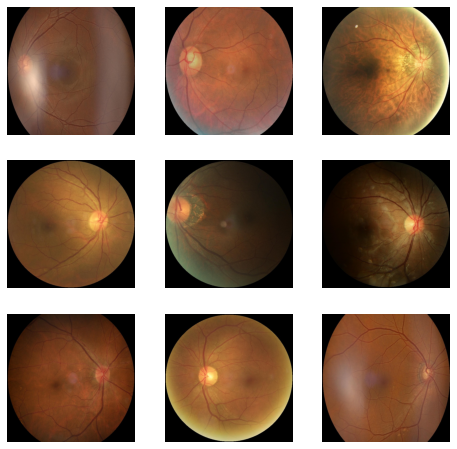

In [49]:
# sample plots for Normal (N)
sample_plotting("Normal", "N")

Sample of Diabetes (D) images:


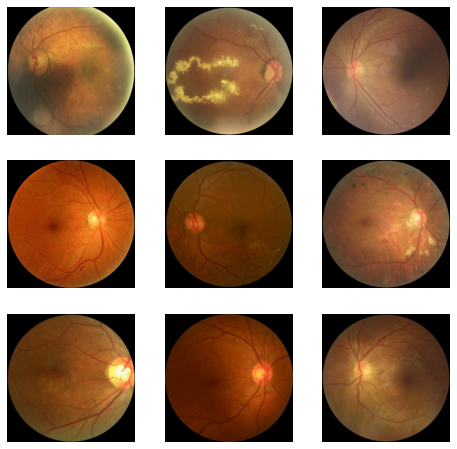

In [50]:
# sample plots for Diabetes (D)
sample_plotting("Diabetes", "D")

Sample of Other diseases/abnormalities (O) images:


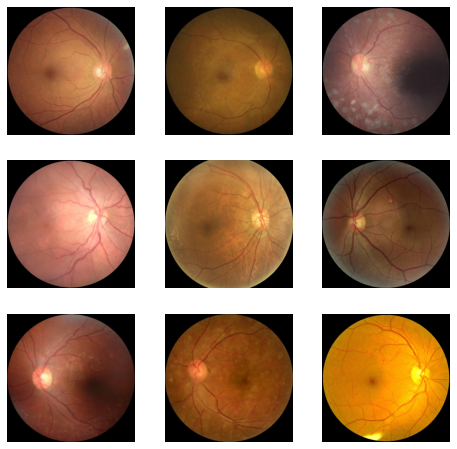

In [51]:
# sample plots for Other diseases/abnormalities (O)
sample_plotting("Other diseases/abnormalities", "O")

Sample of Cataract (C) images:


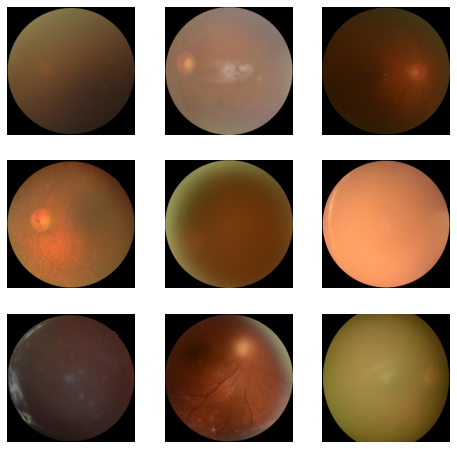

In [52]:
# sample plots for Cataract (C)
sample_plotting("Cataract", "C")

Sample of Glaucoma (G) images:


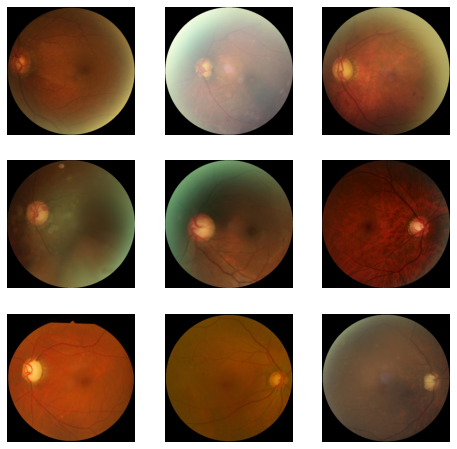

In [53]:
# sample plots for Glaucoma (G)
sample_plotting("Glaucoma", "G")

Sample of Age related Macular Degeneration (A) images:


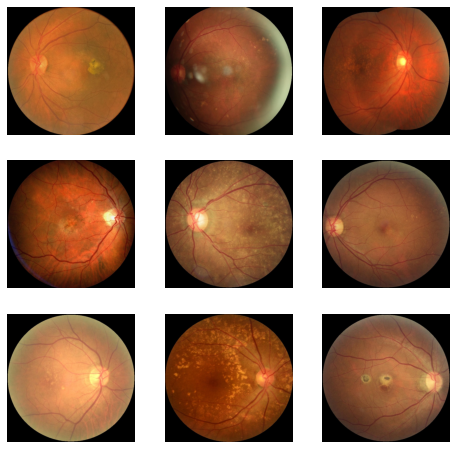

In [54]:
# sample plots for Age related Macular Degeneration (A)
sample_plotting("Age related Macular Degeneration", "A")

Sample of Pathological Myopia (M) images:


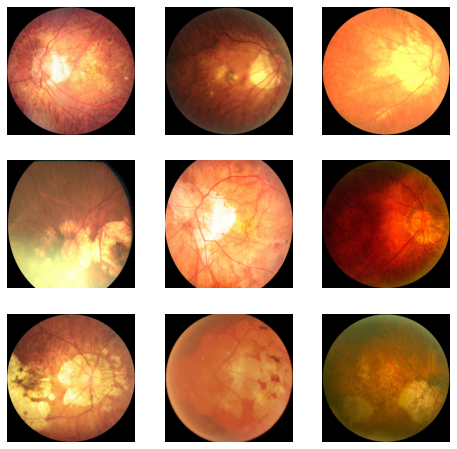

In [55]:
# sample plots for Pathological Myopia (M)
sample_plotting("Pathological Myopia", "M")

Sample of Hypertension (H) images:


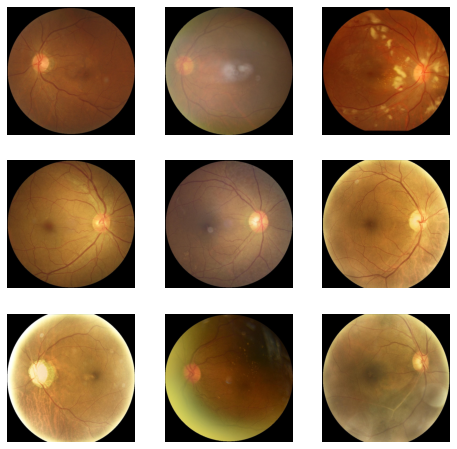

In [56]:
# sample plots for Hypertension (H)
sample_plotting("Hypertension", "H")